In [3]:
import networkx as nx
import os
import json
import matplotlib.pyplot as plt

In [4]:
G = nx.DiGraph()

data_directory = "./data/"

# Load the people followed by account in a list
berts_friends = []
with open(data_directory+"ananya_sajwan.pickle",encoding = 'utf-8') as f:
        friends=json.loads(f.read())
        ananya_friends = [friend["screen_name"] for friend in friends]

# Friends includes people being followed
ananya_friends[:10]

['sqlatspeed',
 'tehgenerallee',
 'Adedba',
 'SQLDiplomat',
 'SSMSCrashed',
 'HackingDave',
 'fs0c131y',
 'JanMulkens',
 'lbredal',
 'tarah']

In [170]:
# Load everyone's friends except mine as nodes in the graph
for filename in os.listdir(data_directory):
    if (filename != "ananya_sajwan.pickle"):
        with open(data_directory+filename,encoding = 'utf-8') as f:
            screen_name = filename.replace(".json","")
            friends = json.loads(f.read())
            
            G.add_node(screen_name,is_friend=True)

            # Add all of my friend's friends
            for friend in friends:
                    # If this friend is in my list of friends, assign the is_friend attribute appropriately
                    if friend["screen_name"] in ananya_friends:
                        is_friend = True
                    else:
                        is_friend = False

                    G.add_node(friend["screen_name"], is_friend = is_friend)
                    G.add_edge(screen_name,friend["screen_name"])
                

In [215]:
# Find the people with the highest number of edges, filtering out the ones that are already my friends
degrees = [{"screen_name": n[0],  "degrees": list(nx.degree(G,n))[0][1]} for n in nx.get_node_attributes(G,'is_friend').items() if n[1] == False]
sorted_degrees = sorted(degrees, key=lambda k:k["degrees"], reverse=True)

# Get the top 50
top_50 = sorted_degrees[1:50]
top_50

[{'screen_name': 'SQLHA', 'degrees': 165},
 {'screen_name': 'KarlaKay22', 'degrees': 158},
 {'screen_name': 'kleegeek', 'degrees': 156},
 {'screen_name': 'StrateSQL', 'degrees': 154},
 {'screen_name': 'hope_foley', 'degrees': 145},
 {'screen_name': 'SQLvariant', 'degrees': 141},
 {'screen_name': 'Neil_Hambly', 'degrees': 140},
 {'screen_name': '_StaciaV_', 'degrees': 139},
 {'screen_name': 'MladenPrajdic', 'degrees': 138},
 {'screen_name': 'kbriankelley', 'degrees': 137},
 {'screen_name': 'mark_AzureCAT', 'degrees': 136},
 {'screen_name': 'SQLBits', 'degrees': 135},
 {'screen_name': 'SQLMickey', 'degrees': 133},
 {'screen_name': 'peschkaj', 'degrees': 132},
 {'screen_name': 'AllenKinsel', 'degrees': 131},
 {'screen_name': 'SQLChick', 'degrees': 130},
 {'screen_name': 'SQLsensei', 'degrees': 129},
 {'screen_name': 'SQLServerCentrl', 'degrees': 128},
 {'screen_name': 'tjaybelt', 'degrees': 127},
 {'screen_name': 'retracement', 'degrees': 126},
 {'screen_name': 'CBellDBA', 'degrees': 126}

In [242]:
# Create a new graph that will only contain the top 50 friends of friends
G2 = nx.DiGraph()

data_directory = "./data/"

# Load me into the graph
G2.add_node("ananya_sajwan", friend_tier=0)

# Add my Friends
with open(data_directory+"ananya_sajwan.pickle",encoding = 'utf-8') as f:
        friends=json.loads(f.read())
        for friend in friends:
            G2.add_node(friend["screen_name"], friend_tier=1)
            G2.add_edge("ananya_sajwan",friend["screen_name"])

# Add my Friends' Friends only if they appear in the top_50 list
for filename in os.listdir(data_directory):
    if (filename != "ananya_sajwan.pickle"):
        with open(data_directory+filename,encoding = 'utf-8') as f:
            screen_name = filename.replace(".json","")
            friends = json.loads(f.read())

            for friend in friends:
                    # Add only the top_50 friends of friends
                    if any(d["screen_name"] == friend["screen_name"] for d in top_50):  
                        G2.add_node(friend["screen_name"], friend_tier=2)
                        G2.add_edge(screen_name,friend["screen_name"])

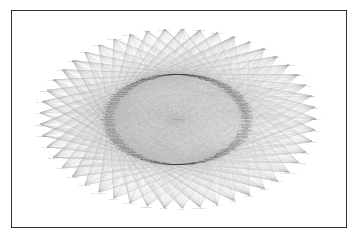

In [295]:
# Shells are the circles that nodes appear on the graph
shell_level_1 = []
shell_level_2 = []

# Add nodes to the appropriate circle
for n in nx.get_node_attributes(G2,'friend_tier').items():
    if n[1] == 2:
        shell_level_2.append(n[0])
    else:
        shell_level_1.append(n[0])

shells = [shell_level_1,shell_level_2]
pos = nx.shell_layout(G2,shells,scale=500)
pos["ananya_sajwan"] =[0,0]

nx.draw_networkx(G2,pos=pos,node_size=1,node_color="#cfcfcf",alpha=.3,arrowsize=1,font_size=2,width=.1,edge_color="#bdbdbd")
plt.savefig("Graph.png", dpi=1000)
plt.show()